In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
%matplotlib inline
from itertools import combinations, product
from sklearn.model_selection import KFold,cross_val_predict,cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression,RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import scale

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
df=pd.read_excel('2019 County Health Rankings Data - v2.xls',3,header=1)

df_addtl = pd.read_excel('2019 County Health Rankings Data - v2.xls',5,header=1)

xls = pd.ExcelFile('unemployment.xls')

unemployment = xls.parse('Unemployment Med HH Inc', skiprows=4, index_col=None, na_values=['NA'])


In [3]:
df_addtl = df_addtl[['FIPS',
                     '% Frequent Physical Distress',
                     '% Frequent Mental Distress',
                     '% Food Insecure',
                     '% Limited Access',
                     '% Insufficient Sleep',
                     '% Uninsured',
                     '% Homeowners',
                     '% Severe Housing Cost Burden',
                     'Population'
                    ]]

In [4]:
df_addtl.head()

,FIPS,% Frequent Physical Distress,% Frequent Mental Distress,% Food Insecure,% Limited Access,% Insufficient Sleep,% Uninsured,% Homeowners,% Severe Housing Cost Burden,Population
0,1001,12.824434,12.638357,13.4,11.991125,35.905406,10.961104,73.287736,12.645206,55504
1,1003,12.622002,12.822558,12.3,5.424427,33.305868,13.570311,72.859338,12.795922,212628
2,1005,16.216160,14.632311,23.2,10.739667,38.563167,16.542240,62.506800,13.586765,25270
3,1007,13.162968,12.854036,15.8,2.601627,38.148865,12.297319,75.361481,8.733889,22668
4,1009,13.720057,13.827943,11.0,2.880150,35.945010,15.564604,78.521025,8.194495,58013


In [5]:
unemployment.head()

,FIPS,State,Area_name,Rural_urban_continuum_code_2013,Urban_influence_code_2013,Metro_2013,Civilian_labor_force_2007,Employed_2007,Unemployed_2007,Unemployment_rate_2007,Civilian_labor_force_2008,Employed_2008,Unemployed_2008,Unemployment_rate_2008,Civilian_labor_force_2009,Employed_2009,Unemployed_2009,Unemployment_rate_2009,Civilian_labor_force_2010,Employed_2010,Unemployed_2010,Unemployment_rate_2010,Civilian_labor_force_2011,Employed_2011,Unemployed_2011,Unemployment_rate_2011,Civilian_labor_force_2012,Employed_2012,Unemployed_2012,Unemployment_rate_2012,Civilian_labor_force_2013,Employed_2013,Unemployed_2013,Unemployment_rate_2013,Civilian_labor_force_2014,Employed_2014,Unemployed_2014,Unemployment_rate_2014,Civilian_labor_force_2015,Employed_2015,Unemployed_2015,Unemployment_rate_2015,Civilian_labor_force_2016,Employed_2016,Unemployed_2016,Unemployment_rate_2016,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Unemployed_avg(2007-2018)
0,0,US,United States,NaN,NaN,NaN,152191093.0,145156134.0,7034959.0,4.6,153761095.0,144860350.0,8900745.0,5.8,153825455.0,139594698.0,14230757.0,9.3,154270732.0,139408204.0,14862528.0,9.63,154606316.0,140765809.0,13840507.0,8.95,155119195.0,142600402.0,12518793.0,8.07,155485692.0,144018151.0,11467541.0,7.38,155957297.0,146338305.0,9618992.0,6.17,156866585.0,148579026.0,8287559.0,5.28,158708795.0,150981151.0,7727644.0,4.87,160273906.0,153293830.0,6980076.0,4.36,161640488.0,155344043.0,6296445.0,3.9,61937.0,NaN,NaN
1,1000,AL,Alabama,NaN,NaN,NaN,2175612.0,2089127.0,86485.0,4.0,2176489.0,2053477.0,123012.0,5.7,2162999.0,1924747.0,238252.0,11.0,2196042.0,1964559.0,231483.0,10.50,2202670.0,1990413.0,212257.0,9.60,2176337.0,2003290.0,173047.0,8.00,2174000.0,2017043.0,156957.0,7.20,2160842.0,2014290.0,146552.0,6.80,2158293.0,2026898.0,131395.0,6.10,2177209.0,2049971.0,127238.0,5.80,2178243.0,2081676.0,96567.0,4.40,2198837.0,2112347.0,86490.0,3.9,49881.0,100.0000,6.916667
2,1001,AL,"Autauga County, AL",2.0,2.0,1.0,24383.0,23577.0,806.0,3.3,24687.0,23420.0,1267.0,5.1,24703.0,22301.0,2402.0,9.7,25713.0,23431.0,2282.0,8.90,25836.0,23677.0,2159.0,8.40,25740.0,23961.0,1779.0,6.90,25810.0,24205.0,1605.0,6.20,25592.0,24097.0,1495.0,5.80,25613.0,24283.0,1330.0,5.20,25966.0,24645.0,1321.0,5.10,25972.0,24958.0,1014.0,3.90,25957.0,25015.0,942.0,3.6,59338.0,118.9591,6.008333
3,1003,AL,"Baldwin County, AL",3.0,2.0,1.0,82659.0,80099.0,2560.0,3.1,83223.0,79372.0,3851.0,4.6,82451.0,74403.0,8048.0,9.8,83459.0,75120.0,8339.0,10.00,85045.0,77418.0,7627.0,9.00,84414.0,78065.0,6349.0,7.50,85280.0,79626.0,5654.0,6.60,86384.0,81083.0,5301.0,6.10,87741.0,82882.0,4859.0,5.50,90670.0,85839.0,4831.0,5.30,92090.0,88342.0,3748.0,4.10,93849.0,90456.0,3393.0,3.6,57588.0,115.4508,6.266667
4,1005,AL,"Barbour County, AL",6.0,6.0,0.0,10334.0,9684.0,650.0,6.3,10161.0,9267.0,894.0,8.8,10003.0,8572.0,1431.0,14.3,10221.0,8959.0,1262.0,12.30,9849.0,8712.0,1137.0,11.50,9362.0,8283.0,1079.0,11.50,9099.0,8168.0,931.0,10.20,8845.0,7913.0,932.0,10.50,8613.0,7848.0,765.0,8.90,8417.0,7717.0,700.0,8.30,8317.0,7831.0,486.0,5.80,8373.0,7940.0,433.0,5.2,34382.0,68.9280,9.466667


In [6]:
unemployment = unemployment[['FIPS','Unemployment_rate_2018','Median_Household_Income_2018',
                            'Unemployed_avg(2007-2018)']]
unemployment.head()

,FIPS,Unemployment_rate_2018,Median_Household_Income_2018,Unemployed_avg(2007-2018)
0,0,3.9,61937.0,NaN
1,1000,3.9,49881.0,6.916667
2,1001,3.6,59338.0,6.008333
3,1003,3.6,57588.0,6.266667
4,1005,5.2,34382.0,9.466667


In [26]:
df=df[['FIPS','State', 'County',
#            'Violent Crime Rate',
#            'Years of Potential Life Lost Rate',
           '% Fair/Poor',
           'Physically Unhealthy Days',
           'Mentally Unhealthy Days',
#            '% LBW',
           '% Smokers',
           '% Obese',
           'Food Environment Index',
           '% Physically Inactive',
           '% With Access',
           '% Excessive Drinking',
#            '% Alcohol-Impaired', 
#            'Chlamydia Rate',
#            'Teen Birth Rate',
#            '% Uninsured',
           'PCP Rate',
           'Dentist Rate',
           'MHP Rate',
#            'Preventable Hosp. Rate',
#            '% Screened',
#            '% Vaccinated',
           'Graduation Rate',
           '% Some College',
#            '% Unemployed',
#            '% Children in Poverty',
           'Income Ratio',
#            '% Single-Parent Households',
           'Association Rate',
#            'Injury Death Rate',
#            'Average Daily PM2.5',
#            'Presence of violation',
           '% Severe Housing Problems',
           '% Drive Alone',
           '% Long Commute - Drives Alone'
          ]]
df.head(3)

,FIPS,State,County,% Fair/Poor,Physically Unhealthy Days,Mentally Unhealthy Days,% Smokers,% Obese,Food Environment Index,% Physically Inactive,% With Access,% Excessive Drinking,PCP Rate,Dentist Rate,MHP Rate,Graduation Rate,% Some College,Income Ratio,Association Rate,% Severe Housing Problems,% Drive Alone,% Long Commute - Drives Alone
0,1001,Alabama,Autauga,18.411124,4.200578,4.306739,19.124658,37.5,7.2,31.1,68.677503,16.878015,41.50426,32.43010,16.21505,90.000000,60.854665,4.636664,12.631731,14.954646,85.965057,38.3
1,1003,Alabama,Baldwin,18.060458,4.098748,4.249649,16.795485,31.0,8.0,23.8,71.971031,16.714969,72.87966,49.85232,91.23916,86.361577,66.133926,4.518560,10.692213,13.831725,84.719423,40.5
2,1005,Alabama,Barbour,25.773416,5.067438,4.634994,21.540878,44.3,5.6,28.2,53.625669,12.698715,38.51338,35.61535,7.91452,81.410256,36.774008,5.755063,8.472944,15.455531,83.404353,33.8


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 22 columns):
FIPS                             3142 non-null int64
State                            3142 non-null object
County                           3142 non-null object
% Fair/Poor                      3142 non-null float64
Physically Unhealthy Days        3142 non-null float64
Mentally Unhealthy Days          3142 non-null float64
% Smokers                        3142 non-null float64
% Obese                          3142 non-null float64
Food Environment Index           3123 non-null float64
% Physically Inactive            3142 non-null float64
% With Access                    3136 non-null float64
% Excessive Drinking             3142 non-null float64
PCP Rate                         3007 non-null float64
Dentist Rate                     3057 non-null float64
MHP Rate                         2890 non-null float64
Graduation Rate                  3043 non-null float64
% Some College   

In [28]:
df_2 = (pd.merge(df,df_addtl, how='left', on=['FIPS']))

df_new = pd.merge(df_2, unemployment, how='left', on=['FIPS'])

In [29]:
df_new.head()

,FIPS,State,County,% Fair/Poor,Physically Unhealthy Days,Mentally Unhealthy Days,% Smokers,% Obese,Food Environment Index,% Physically Inactive,% With Access,% Excessive Drinking,PCP Rate,Dentist Rate,MHP Rate,Graduation Rate,% Some College,Income Ratio,Association Rate,% Severe Housing Problems,% Drive Alone,% Long Commute - Drives Alone,% Frequent Physical Distress,% Frequent Mental Distress,% Food Insecure,% Limited Access,% Insufficient Sleep,% Uninsured,% Homeowners,% Severe Housing Cost Burden,Population,Unemployment_rate_2018,Median_Household_Income_2018,Unemployed_avg(2007-2018)
0,1001,Alabama,Autauga,18.411124,4.200578,4.306739,19.124658,37.5,7.2,31.1,68.677503,16.878015,41.50426,32.43010,16.21505,90.000000,60.854665,4.636664,12.631731,14.954646,85.965057,38.3,12.824434,12.638357,13.4,11.991125,35.905406,10.961104,73.287736,12.645206,55504,3.6,59338.0,6.008333
1,1003,Alabama,Baldwin,18.060458,4.098748,4.249649,16.795485,31.0,8.0,23.8,71.971031,16.714969,72.87966,49.85232,91.23916,86.361577,66.133926,4.518560,10.692213,13.831725,84.719423,40.5,12.622002,12.822558,12.3,5.424427,33.305868,13.570311,72.859338,12.795922,212628,3.6,57588.0,6.266667
2,1005,Alabama,Barbour,25.773416,5.067438,4.634994,21.540878,44.3,5.6,28.2,53.625669,12.698715,38.51338,35.61535,7.91452,81.410256,36.774008,5.755063,8.472944,15.455531,83.404353,33.8,16.216160,14.632311,23.2,10.739667,38.563167,16.542240,62.506800,13.586765,25270,5.2,34382.0,9.466667
3,1007,Alabama,Bibb,19.996912,4.363377,4.315710,19.916404,37.8,7.6,34.9,16.251364,15.925151,57.41289,26.46903,8.82301,83.763838,48.406310,4.254594,10.157665,10.960854,86.365902,48.6,13.162968,12.854036,15.8,2.601627,38.148865,12.297319,75.361481,8.733889,22668,4.0,46064.0,7.508333
4,1009,Alabama,Blount,21.095323,4.512753,4.701599,19.652158,34.4,8.5,28.5,22.949304,15.378722,22.52877,20.68502,10.34251,93.468795,54.413998,4.126883,9.011507,10.401153,86.792275,59.7,13.720057,13.827943,11.0,2.880150,35.945010,15.564604,78.521025,8.194495,58013,3.5,50412.0,6.166667


In [30]:
df_new.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3142 entries, 0 to 3141
Data columns (total 34 columns):
FIPS                             3142 non-null int64
State                            3142 non-null object
County                           3142 non-null object
% Fair/Poor                      3142 non-null float64
Physically Unhealthy Days        3142 non-null float64
Mentally Unhealthy Days          3142 non-null float64
% Smokers                        3142 non-null float64
% Obese                          3142 non-null float64
Food Environment Index           3123 non-null float64
% Physically Inactive            3142 non-null float64
% With Access                    3136 non-null float64
% Excessive Drinking             3142 non-null float64
PCP Rate                         3007 non-null float64
Dentist Rate                     3057 non-null float64
MHP Rate                         2890 non-null float64
Graduation Rate                  3043 non-null float64
% Some College   

In [31]:
df_new.head()

,FIPS,State,County,% Fair/Poor,Physically Unhealthy Days,Mentally Unhealthy Days,% Smokers,% Obese,Food Environment Index,% Physically Inactive,% With Access,% Excessive Drinking,PCP Rate,Dentist Rate,MHP Rate,Graduation Rate,% Some College,Income Ratio,Association Rate,% Severe Housing Problems,% Drive Alone,% Long Commute - Drives Alone,% Frequent Physical Distress,% Frequent Mental Distress,% Food Insecure,% Limited Access,% Insufficient Sleep,% Uninsured,% Homeowners,% Severe Housing Cost Burden,Population,Unemployment_rate_2018,Median_Household_Income_2018,Unemployed_avg(2007-2018)
0,1001,Alabama,Autauga,18.411124,4.200578,4.306739,19.124658,37.5,7.2,31.1,68.677503,16.878015,41.50426,32.43010,16.21505,90.000000,60.854665,4.636664,12.631731,14.954646,85.965057,38.3,12.824434,12.638357,13.4,11.991125,35.905406,10.961104,73.287736,12.645206,55504,3.6,59338.0,6.008333
1,1003,Alabama,Baldwin,18.060458,4.098748,4.249649,16.795485,31.0,8.0,23.8,71.971031,16.714969,72.87966,49.85232,91.23916,86.361577,66.133926,4.518560,10.692213,13.831725,84.719423,40.5,12.622002,12.822558,12.3,5.424427,33.305868,13.570311,72.859338,12.795922,212628,3.6,57588.0,6.266667
2,1005,Alabama,Barbour,25.773416,5.067438,4.634994,21.540878,44.3,5.6,28.2,53.625669,12.698715,38.51338,35.61535,7.91452,81.410256,36.774008,5.755063,8.472944,15.455531,83.404353,33.8,16.216160,14.632311,23.2,10.739667,38.563167,16.542240,62.506800,13.586765,25270,5.2,34382.0,9.466667
3,1007,Alabama,Bibb,19.996912,4.363377,4.315710,19.916404,37.8,7.6,34.9,16.251364,15.925151,57.41289,26.46903,8.82301,83.763838,48.406310,4.254594,10.157665,10.960854,86.365902,48.6,13.162968,12.854036,15.8,2.601627,38.148865,12.297319,75.361481,8.733889,22668,4.0,46064.0,7.508333
4,1009,Alabama,Blount,21.095323,4.512753,4.701599,19.652158,34.4,8.5,28.5,22.949304,15.378722,22.52877,20.68502,10.34251,93.468795,54.413998,4.126883,9.011507,10.401153,86.792275,59.7,13.720057,13.827943,11.0,2.880150,35.945010,15.564604,78.521025,8.194495,58013,3.5,50412.0,6.166667


In [36]:
column_isna_list = ['Food Environment Index',
                    '% With Access',
               'PCP Rate',
                   'Dentist Rate',
                   'MHP Rate',
                    'Graduation Rate',
                    '% Limited Access'] 

for column in column_isna_list:
    df_new[column] = df_new.groupby("State")[column].transform(lambda x: x.fillna(x.mean()))
# replace null values with state average





In [37]:
df_new.head()

,FIPS,State,County,% Fair/Poor,Physically Unhealthy Days,Mentally Unhealthy Days,% Smokers,% Obese,Food Environment Index,% Physically Inactive,% With Access,% Excessive Drinking,PCP Rate,Dentist Rate,MHP Rate,Graduation Rate,% Some College,Income Ratio,Association Rate,% Severe Housing Problems,% Drive Alone,% Long Commute - Drives Alone,% Frequent Physical Distress,% Frequent Mental Distress,% Food Insecure,% Limited Access,% Insufficient Sleep,% Uninsured,% Homeowners,% Severe Housing Cost Burden,Population,Unemployment_rate_2018,Median_Household_Income_2018,Unemployed_avg(2007-2018)
0,1001,Alabama,Autauga,18.411124,4.200578,4.306739,19.124658,37.5,7.2,31.1,68.677503,16.878015,41.50426,32.43010,16.21505,90.000000,60.854665,4.636664,12.631731,14.954646,85.965057,38.3,12.824434,12.638357,13.4,11.991125,35.905406,10.961104,73.287736,12.645206,55504,3.6,59338.0,6.008333
1,1003,Alabama,Baldwin,18.060458,4.098748,4.249649,16.795485,31.0,8.0,23.8,71.971031,16.714969,72.87966,49.85232,91.23916,86.361577,66.133926,4.518560,10.692213,13.831725,84.719423,40.5,12.622002,12.822558,12.3,5.424427,33.305868,13.570311,72.859338,12.795922,212628,3.6,57588.0,6.266667
2,1005,Alabama,Barbour,25.773416,5.067438,4.634994,21.540878,44.3,5.6,28.2,53.625669,12.698715,38.51338,35.61535,7.91452,81.410256,36.774008,5.755063,8.472944,15.455531,83.404353,33.8,16.216160,14.632311,23.2,10.739667,38.563167,16.542240,62.506800,13.586765,25270,5.2,34382.0,9.466667
3,1007,Alabama,Bibb,19.996912,4.363377,4.315710,19.916404,37.8,7.6,34.9,16.251364,15.925151,57.41289,26.46903,8.82301,83.763838,48.406310,4.254594,10.157665,10.960854,86.365902,48.6,13.162968,12.854036,15.8,2.601627,38.148865,12.297319,75.361481,8.733889,22668,4.0,46064.0,7.508333
4,1009,Alabama,Blount,21.095323,4.512753,4.701599,19.652158,34.4,8.5,28.5,22.949304,15.378722,22.52877,20.68502,10.34251,93.468795,54.413998,4.126883,9.011507,10.401153,86.792275,59.7,13.720057,13.827943,11.0,2.880150,35.945010,15.564604,78.521025,8.194495,58013,3.5,50412.0,6.166667


In [38]:
df_new.isna().sum()

FIPS                             0
State                            0
County                           0
% Fair/Poor                      0
Physically Unhealthy Days        0
Mentally Unhealthy Days          0
% Smokers                        0
% Obese                          0
Food Environment Index           0
% Physically Inactive            0
% With Access                    0
% Excessive Drinking             0
PCP Rate                         0
Dentist Rate                     0
MHP Rate                         0
Graduation Rate                  0
% Some College                   0
Income Ratio                     0
Association Rate                 0
% Severe Housing Problems        0
% Drive Alone                    0
% Long Commute - Drives Alone    0
% Frequent Physical Distress     0
% Frequent Mental Distress       0
% Food Insecure                  0
% Limited Access                 0
% Insufficient Sleep             0
% Uninsured                      1
% Homeowners        

In [39]:
df1 = df_new[df_new.isna().any(axis=1)]

df1
# small population states with multiple null values, so drop

,FIPS,State,County,% Fair/Poor,Physically Unhealthy Days,Mentally Unhealthy Days,% Smokers,% Obese,Food Environment Index,% Physically Inactive,% With Access,% Excessive Drinking,PCP Rate,Dentist Rate,MHP Rate,Graduation Rate,% Some College,Income Ratio,Association Rate,% Severe Housing Problems,% Drive Alone,% Long Commute - Drives Alone,% Frequent Physical Distress,% Frequent Mental Distress,% Food Insecure,% Limited Access,% Insufficient Sleep,% Uninsured,% Homeowners,% Severe Housing Cost Burden,Population,Unemployment_rate_2018,Median_Household_Income_2018,Unemployed_avg(2007-2018)
548,15005,Hawaii,Kalawao,14.017149,3.214459,3.171273,12.671810,22.8,7.3,20.5,100.0,16.653588,0.0,0.0,0.0,82.878368,81.250000,5.477273,0.0,18.181818,32.812500,0.0,9.636388,9.996988,18.8,0.000000,38.328812,NaN,3.773585,6.666667,88,NaN,NaN,NaN
2673,48301,Texas,Loving,18.370342,3.618747,3.680144,19.109575,28.8,2.7,22.2,0.0,19.219299,0.0,0.0,0.0,92.775000,58.333333,2.628295,0.0,17.777778,71.794872,21.4,11.242246,11.759326,18.7,50.588235,32.594713,21.052632,51.612903,NaN,134,3.9,78637.0,5.875


In [40]:
df_new.dropna(how='any',inplace=True)

In [41]:
df_new.isna().sum()

FIPS                             0
State                            0
County                           0
% Fair/Poor                      0
Physically Unhealthy Days        0
Mentally Unhealthy Days          0
% Smokers                        0
% Obese                          0
Food Environment Index           0
% Physically Inactive            0
% With Access                    0
% Excessive Drinking             0
PCP Rate                         0
Dentist Rate                     0
MHP Rate                         0
Graduation Rate                  0
% Some College                   0
Income Ratio                     0
Association Rate                 0
% Severe Housing Problems        0
% Drive Alone                    0
% Long Commute - Drives Alone    0
% Frequent Physical Distress     0
% Frequent Mental Distress       0
% Food Insecure                  0
% Limited Access                 0
% Insufficient Sleep             0
% Uninsured                      0
% Homeowners        

In [42]:
df_new.head()

,FIPS,State,County,% Fair/Poor,Physically Unhealthy Days,Mentally Unhealthy Days,% Smokers,% Obese,Food Environment Index,% Physically Inactive,% With Access,% Excessive Drinking,PCP Rate,Dentist Rate,MHP Rate,Graduation Rate,% Some College,Income Ratio,Association Rate,% Severe Housing Problems,% Drive Alone,% Long Commute - Drives Alone,% Frequent Physical Distress,% Frequent Mental Distress,% Food Insecure,% Limited Access,% Insufficient Sleep,% Uninsured,% Homeowners,% Severe Housing Cost Burden,Population,Unemployment_rate_2018,Median_Household_Income_2018,Unemployed_avg(2007-2018)
0,1001,Alabama,Autauga,18.411124,4.200578,4.306739,19.124658,37.5,7.2,31.1,68.677503,16.878015,41.50426,32.43010,16.21505,90.000000,60.854665,4.636664,12.631731,14.954646,85.965057,38.3,12.824434,12.638357,13.4,11.991125,35.905406,10.961104,73.287736,12.645206,55504,3.6,59338.0,6.008333
1,1003,Alabama,Baldwin,18.060458,4.098748,4.249649,16.795485,31.0,8.0,23.8,71.971031,16.714969,72.87966,49.85232,91.23916,86.361577,66.133926,4.518560,10.692213,13.831725,84.719423,40.5,12.622002,12.822558,12.3,5.424427,33.305868,13.570311,72.859338,12.795922,212628,3.6,57588.0,6.266667
2,1005,Alabama,Barbour,25.773416,5.067438,4.634994,21.540878,44.3,5.6,28.2,53.625669,12.698715,38.51338,35.61535,7.91452,81.410256,36.774008,5.755063,8.472944,15.455531,83.404353,33.8,16.216160,14.632311,23.2,10.739667,38.563167,16.542240,62.506800,13.586765,25270,5.2,34382.0,9.466667
3,1007,Alabama,Bibb,19.996912,4.363377,4.315710,19.916404,37.8,7.6,34.9,16.251364,15.925151,57.41289,26.46903,8.82301,83.763838,48.406310,4.254594,10.157665,10.960854,86.365902,48.6,13.162968,12.854036,15.8,2.601627,38.148865,12.297319,75.361481,8.733889,22668,4.0,46064.0,7.508333
4,1009,Alabama,Blount,21.095323,4.512753,4.701599,19.652158,34.4,8.5,28.5,22.949304,15.378722,22.52877,20.68502,10.34251,93.468795,54.413998,4.126883,9.011507,10.401153,86.792275,59.7,13.720057,13.827943,11.0,2.880150,35.945010,15.564604,78.521025,8.194495,58013,3.5,50412.0,6.166667


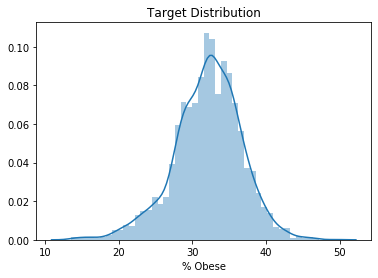

In [43]:
sns.distplot(df_new['% Obese'])
plt.title('Target Distribution')
plt.show()

In [44]:
X=df_new.drop(columns=['FIPS','State','County','% Obese'])
y=df_new['% Obese']

In [54]:
#Splitting Datasets into Training and Testing, ensuring that testing size is at least 1000 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1348)

In [55]:
regression = LinearRegression()

crossvalidation = KFold(n_splits=5, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(regression, X_train, y_train, scoring='r2', cv=crossvalidation))
baseline

0.5897322390225245

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [52]:
def calculate_vif(X, thresh=5):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
              for ix in range(X.iloc[:, variables].shape[1])]
        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping\'' + X.iloc[:, variables].columns[maxloc] +
                 '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True
    print('Remaining variables')
    print(X.columns[variables])
    return X.iloc[:, variables]

In [53]:
calculate_vif(X)

dropping'% Frequent Physical Distress' at index: 18
dropping'% Frequent Mental Distress' at index: 18
dropping'Food Environment Index' at index: 4
dropping'Physically Unhealthy Days' at index: 1
dropping'% Insufficient Sleep' at index: 18
dropping'Mentally Unhealthy Days' at index: 1
dropping'% Drive Alone' at index: 13
dropping'Graduation Rate' at index: 8
dropping'% Homeowners' at index: 16
dropping'% Fair/Poor' at index: 0
dropping'Income Ratio' at index: 8
dropping'% Smokers' at index: 0
dropping'% Some College' at index: 6
dropping'Unemployed_avg(2007-2018)' at index: 16
dropping'% Excessive Drinking' at index: 2
dropping'% Severe Housing Problems' at index: 6
dropping'% Physically Inactive' at index: 0
dropping'% Food Insecure' at index: 6
dropping'Median_Household_Income_2018' at index: 11
dropping'% Severe Housing Cost Burden' at index: 8
dropping'% With Access' at index: 0
dropping'Unemployment_rate_2018' at index: 8
Remaining variables
Index(['PCP Rate', 'Dentist Rate', 'MHP 

,PCP Rate,Dentist Rate,MHP Rate,Association Rate,% Long Commute - Drives Alone,% Limited Access,% Uninsured,Population
0,41.50426,32.43010,16.21505,12.631731,38.3,11.991125,10.961104,55504
1,72.87966,49.85232,91.23916,10.692213,40.5,5.424427,13.570311,212628
2,38.51338,35.61535,7.91452,8.472944,33.8,10.739667,16.542240,25270
3,57.41289,26.46903,8.82301,10.157665,48.6,2.601627,12.297319,22668
4,22.52877,20.68502,10.34251,9.011507,59.7,2.880150,15.564604,58013
...,...,...,...,...,...,...,...,...
3137,33.96355,52.83227,229.70552,9.962640,18.6,10.845331,15.270087,43534
3138,120.73649,85.96604,416.93531,18.110474,14.6,7.409463,16.043395,23265
3139,38.51153,82.94706,341.54672,5.295335,17.8,9.727151,15.073191,20495
3140,48.57316,74.40476,347.22222,19.429265,10.6,3.621591,19.590128,8064


In [ ]:
variables = ['% Physically Inactive', '% Food Insecure','Association Rate', '% Long Commute - Drives Alone', '% Uninsured', '% Severe Housing Cost Burden', 'Population', 'Unemployment_rate_2018']

In [ ]:
X = df_new.filter(['% Physically Inactive', '% Food Insecure','Association Rate', '% Long Commute - Drives Alone', '% Uninsured', '% Severe Housing Cost Burden', 'Population', 'Unemployment_rate_2018'], axis=1)
        

        
X

In [ ]:
vif = [variance_inflation_factor(X_new.values, i) for i in range(len(x_cols))]
list(zip(x_cols, vif))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=138)

In [ ]:
regression = LinearRegression()

crossvalidation = KFold(n_splits=5, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(regression, X_train, y_train, scoring='r2', cv=crossvalidation))
baseline

In [ ]:
from itertools import combinations
combinations = list(combinations(X.columns, 2))

interactions = []
data = X.copy()
for comb in combinations:
    data['interaction'] = data[comb[0]] * data[comb[1]]
    score = np.mean(cross_val_score(regression, data, y, scoring='r2', cv=crossvalidation))
    interactions.append((comb[0], comb[1], round(score, 3)))
            
print('Interactions: %s' %sorted(interactions, key=lambda inter: inter[2], reverse=True))

In [ ]:
df_inter = X.copy()
ls_interactions = sorted(interactions, key=lambda inter: inter[2], reverse=True)
for inter in ls_interactions:
    df_inter[inter[0] + '_' + inter[1]] = X[inter[0]] * X[inter[1]]

In [ ]:
df_inter

In [ ]:
X.shape

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
polynomials = []
for col in X.columns:
    for degree in [2, 3, 4]:
        data = X.copy()
        poly = PolynomialFeatures(degree, include_bias=False)
        X_transformed = poly.fit_transform(X[[col]])
        data = pd.concat([data.drop(col, axis=1),pd.DataFrame(X_transformed)], axis=1)
        score = np.mean(cross_val_score(regression, data, y_train, scoring='r2', cv=crossvalidation))
        if score > baseline: polynomials.append((col, degree, round(score, 3)))
print('Top 10 polynomials: %s' %sorted(polynomials, key=lambda poly: poly[2], reverse=True)[:10])

In [ ]:
polynom = pd.DataFrame(polynomials)
polynom.groupby([0], sort=False)[2].max()


In [ ]:
for col in ['% Physically Inactive','Mentally Unhealthy Days','Mentally Unhealthy Days','% Physically Inactive','Median_Household_Income_2018','% Physically Inactive', 'Mentally Unhealthy Days',
            '% Some College','% Some College','% Some College']:
    poly = PolynomialFeatures(4, include_bias=False)
    X_transformed = poly.fit_transform(X[[col]])
    colnames= [col, col + '_' + '2',  col + '_' + '3', col + '_' + '4']
    df_inter = pd.concat([df_inter.drop(col, axis=1), pd.DataFrame(X_transformed, columns=colnames)], axis=1)


In [ ]:
df_inter.isna().sum()

In [ ]:
df2 = df_inter[df_inter.isna().any(axis=1)]
df2

df_inter.isna()

In [ ]:
df_new.groupby("State").transform(lambda x: x.fillna(x.mean()))

In [ ]:

vif = [variance_inflation_factor(X_new.values, i) for i in range(len(x_cols))]
list(zip(x_cols, vif))
